In [173]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [160]:
data=pd.read_csv('C:/Users/KIMYEONKYOUNG/Desktop/code/Marketing_2020_v2.0/train_dataset.csv')
test=pd.read_csv('C:/Users/KIMYEONKYOUNG/Desktop/code/Marketing_2020_v2.0/test_dataset.csv')

In [156]:
data3['Variable858'].unique()

array(['V5', 'W2', 'A6', 'X4'], dtype=object)

In [157]:
labelencoder_X_1 = LabelEncoder()
data3['Variable858_test'] = labelencoder_X_1.fit_transform(data3['Variable858'])
data3['Variable858_test'] .unique()

array([1, 2, 0, 3])

In [158]:
test3['Variable858']#.unique()

0      A6
1      V5
2      W2
3      V5
4      V5
       ..
994    A6
995    W2
996    V5
997    W2
998    A6
Name: Variable858, Length: 910, dtype: object

In [159]:
labelencoder_X_1 = LabelEncoder()
test3['Variable858_test']= labelencoder_X_1.fit_transform(test3['Variable858'])
test3['Variable858_test']#.unique()

0      0
1      1
2      2
3      1
4      1
      ..
994    0
995    2
996    1
997    2
998    0
Name: Variable858_test, Length: 910, dtype: int32

In [161]:
print(data.info())
d_type=pd.DataFrame(data.dtypes,columns=['type'])
print(d_type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 1719 entries, target to Variable1717
dtypes: bool(13), float64(229), int64(1457), object(20)
memory usage: 52.1+ MB
None
                type
target         int64
ID             int64
Variable1      int64
Variable2      int64
Variable3      int64
...              ...
Variable1713  object
Variable1714   int64
Variable1715   int64
Variable1716   int64
Variable1717   int64

[1719 rows x 1 columns]


In [162]:
data2=data.dropna()   #na를 0으로 채우는 방법 #how='all'(전부 nan인 값만)
data2=data2.replace(to_replace=-99999,value=np.nan)#-99999를 결측값으로

data3=data2.fillna(0)    #na를 0으로 / method='pad'(결측치 바로 이전의 값) / method='bfill'(결측치 바로 뒤의 값) 

In [163]:
test2=test.dropna()   #na를 0으로 채우는 방법 #how='all'(전부 nan인 값만)
test2=test2.replace(to_replace=-99999,value=np.nan)#-99999를 결측값으로

test3=test2.fillna(0) 

In [123]:
bool_col=list(d_type['type'][d_type['type']=='bool'].index)  
int64_col=list(d_type['type'][d_type['type']=='int64'].index)  
object_col=list(d_type['type'][d_type['type']=='object'].index)  
float64_col=list(d_type['type'][d_type['type']=='float64'].index)

use_bool=['Variable1293','Variable1635','Variable680','Variable726']
date_list=['Variable236','Variable265','Variable1607'] #제외할 날짜변수
use_object=[x for x in object_col if x not in date_list]
Y_list=['target','ID']#제외할 변수(target,ID)

features=use_bool+int64_col+float64_col# +use_object
features_list=[x for x in features if x not in Y_list]

0    2840
1     779
Name: target, dtype: int64

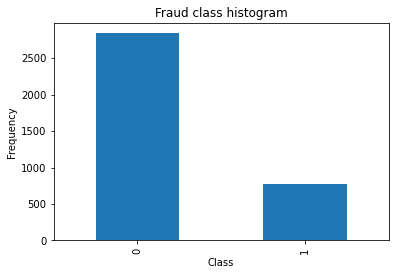

In [103]:
# 종속변수 Y의 갯수 분포 확인
pd.value_counts(data3['target']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
data3['target'].value_counts()

In [124]:
#data process
# Import some data to play with
x = data3[features_list]
y=data3['target']

# Encoding the categorical data
labelencoder_X_1 = LabelEncoder()
for col_name in use_bool:
    print(col_name)
    x[str(col_name)] = labelencoder_X_1.fit_transform(x[str(col_name)])
    
# one_hot Encoding the categorical data(object)
from sklearn.preprocessing import OneHotEncoder
# oe_style = OneHotEncoder()
# oe_results = oe_style.fit_transform(data3[use_object])
# oh=pd.get_dummies(data3, columns=[use_object])

# X=pd.concat((x,oh),axis=1)

Variable1293
Variable1635
Variable680
Variable726


<ipython-input-124-9945bdd22df4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[str(col_name)] = labelencoder_X_1.fit_transform(x[str(col_name)])


In [125]:
x

,Variable1293,Variable1635,Variable680,Variable726,Variable1,Variable2,Variable3,Variable4,Variable5,Variable6,...,Variable1637,Variable1642,Variable1644,Variable1649,Variable1665,Variable1671,Variable1674,Variable1698,Variable1699,Variable1712
0,0,1,1,0,1,0,1,-1,0.0,0,...,0.0,0.00,35.0,0.0,0.0,0.0,0.0,-1.0,35.0,0.0
1,0,1,1,0,1,0,1,1,1.0,0,...,0.0,0.88,253.0,0.0,0.0,0.0,1.0,0.0,253.0,0.0
2,0,1,1,0,1,0,1,-1,2.0,1,...,0.0,0.96,30.0,0.0,0.0,0.0,0.0,0.0,30.0,1.0
3,0,1,1,0,1,0,1,1,0.0,-1,...,0.0,0.00,44.0,0.0,0.0,0.0,0.0,-1.0,44.0,0.0
4,0,1,0,0,3,0,6,-1,0.0,3,...,0.0,0.00,40.0,0.0,0.0,5.0,0.0,-1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,1,0,0,1,0,2,-1,1.0,0,...,0.0,0.00,71.0,0.0,0.0,0.0,0.0,-1.0,71.0,0.0
3996,0,1,1,0,1,-1,1,-1,0.0,-1,...,0.0,0.00,88.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0
3997,0,1,1,0,1,0,1,-1,0.0,0,...,0.0,0.73,104.0,0.0,0.0,0.0,0.0,0.0,104.0,-1.0
3998,0,1,1,0,1,0,1,-1,1.0,2,...,0.0,1.69,53.0,0.0,0.0,0.0,0.0,-1.0,31.0,0.0


In [126]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, shuffle=True)

#XGboost

In [127]:
import xgboost as xgb

In [128]:
dt = xgb.DMatrix(x_train,label=y_train)
dv = xgb.DMatrix(x_valid,label=y_valid) 

In [130]:
#Build the model
params = {
    "eta": 0.2,
    "max_depth": 5,
    "objective": "binary:logistic",
    "silent": 1,
    "base_score": np.mean(y_train),
    'n_estimators': 1000,
    "eval_metric": "logloss"
}
model = xgb.train(params, dt, 3000, [(dt, "train"),(dv, "valid")], verbose_eval=200)

[15:23:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[1]	train-logloss:0.44937	valid-logloss:0.50455
[2]	train-logloss:0.42328	valid-logloss:0.49645
[3]	train-logloss:0.40352	valid-logloss:0.48693
[4]	train-logloss:0.38485	valid-logloss:0.48205
[5]	train-logloss:0.36626	valid-logloss:0.48173
[6]	train-logloss:0.34879	valid-logloss:0.47957
[7]	train-logloss:0.33722	valid-logloss:0.47489
[8]	train-logloss:0.32869	valid-logloss:0.47396
[9]	train-logloss:0.31378	valid-logloss:0.47314
[10]	train-logloss:0.30606	valid-logloss:0.47311
[11]	train-logloss:0.29462	valid-logloss:0.47143
[12]	train-logloss:0.29020	valid-logloss:0.47027
[13]	train-logloss:0.28

In [134]:
y_pred = model.predict(dv)

# Making the Confusion Matrix
cm = confusion_matrix(y_valid, (y_pred>0.5))
print('The Confusion Matrix is: ','\n', cm)

The Confusion Matrix is:  
 [[668  35]
 [164  38]]


In [176]:
# Calculate the accuracy on validation set
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
predict_precision_on_test_set = (cm[0,0] )/(cm[0,0] +cm[1,0])
predict_recall_on_test_set = (cm[0,0] )/(cm[0,0]  + cm[0,1] )
predict_precision_on_test_set = (cm[0,0] )/(cm[0,0] +cm[1,0] )

print('The Accuracy on Test Set is: ', predict_accuracy_on_test_set)
print('The precision on Test Set is: ', predict_precision_on_test_set)
print('The recall on Test Set is: ', predict_recall_on_test_set)

The Accuracy on Test Set is:  0.7801104972375691
The precision on Test Set is:  0.8028846153846154
The recall on Test Set is:  0.9502133712660028


In [182]:
# from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.metrics import roc_auc_score

####do cross validation
scores = cross_val_score(model, x_valid ,y_valid, cv = 5, scoring='roc_auc')
print(scores)
print('교차검증 평균: ', scores.mean())

TypeError: estimator should be an estimator implementing 'fit' method, <xgboost.core.Booster object at 0x000001CC94C412E0> was passed

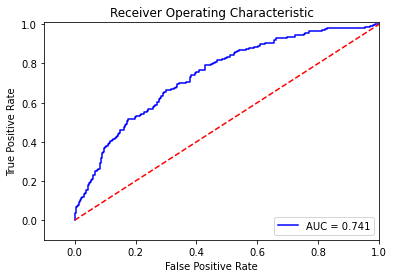

In [175]:
fpr, tpr, thresholds =metrics. roc_curve(np.array(y_valid), y_pred)

roc_auc = metrics.auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [177]:
from sklearn.model_selection import GridSearchCV

In [178]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [2, 3, 4, 5, 6, 7, 9, 10],
    'learning_rate': [0.01, 0.1, 1.0]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [180]:
grid_search.fit(dt, dv)

TypeError: estimator should be an estimator implementing 'fit' method, <xgboost.core.Booster object at 0x000001CC94C412E0> was passed

In [190]:
from sklearn.externals import joblib
import pickle
saved_model = pickle.dumps(model)
joblib.dump(model, 'xgboost_v0.1.pkl') 

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\__init__.py)

In [188]:

# Load the pickled model
clf_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
clf_from_pickle.predict(X)

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\__init__.py)

In [ ]:
#svm (scaling 해야함)
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import MinMaxScaler